<a href="https://colab.research.google.com/github/eddorileo/saudeDigital/blob/main/src/AnaliseExploratoriaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ciência de Dados e Saúde Digital
##Estudo de Caso: Absenteísmo (No-show)
Facilitador: Éderson Dorileo, MSc, PhD


###1. Importação e Limpeza dos Dados

In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Carregar a base de dados
df = pd.read_csv('no_show.csv')

# Visualizar as primeiras linhas da base de dados
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df.info()
df.describe()


###2. Tratamento de Dados Nulos e Inconsistências

In [2]:
#deletar colunas desnecessarias
df = df.drop(columns=['PatientId', 'AppointmentID'])

# Verificar valores nulos
#df.isnull().sum()

# Tratar valores nulos (se necessário)
df = df.dropna()

# Exemplo: Verificar idade negativa
df = df[df['Age'] >= 0]

# Verificar duplicatas
df = df.drop_duplicates()

# # Transformar a variável categórica 'No-show' em numérica
# # Dados categóricos não são adequados para correlação Pearson
# # Transformação está ok para correlação Spearman (ordinais ou binarios)
# df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0}).copy()

# # Transformar a variável categórica 'Gender' em numérica
# df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

# # Filtrar colunas numéricas, incluindo a variável target transformada
# numerical_cols = df.select_dtypes(include=[np.number]).columns

# # Remover valores nulos (se houver) nas colunas numéricas
# df_numerical = df[numerical_cols].dropna()

data = df

###3. Tabela e seus Elementos

In [ ]:

# Convertendo 'AppointmentDay' para datetime e extraindo o dia da semana
# df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
# df['DayOfWeek'] = df['AppointmentDay'].dt.day_name(locale='pt_BR.UTF-8')
df['DayOfWeek'] = df['AppointmentDay'].dt.day_name()


# Mapeando os dias da semana para português (seg, ter, qua, qui, sex)
day_mapping = {
    "Monday": "seg",
    "Tuesday": "ter",
    "Wednesday": "qua",
    "Thursday": "qui",
    "Friday": "sex",
    "Saturday": "sáb",
    "Sunday": "dom"
}
df['DayOfWeek'] = df['DayOfWeek'].map(day_mapping)

# Organizando a tabela para contabilizar "No-show" por dia da semana
table = df.groupby(['DayOfWeek', 'No-show']).size().unstack(fill_value=0)

# Ordenando a tabela pelos dias da semana em ordem crescente
day_order = ["seg", "ter", "qua", "qui", "sex", "sáb", "dom"]
table = table.reindex(day_order)

# Exibindo a tabela
print(table)

No-show         No     Yes
DayOfWeek                 
seg        18025.0  4690.0
ter        20488.0  5152.0
qua        20774.0  5093.0
qui        13909.0  3338.0
sex        14982.0  4037.0
sáb           30.0     9.0
dom            NaN     NaN


In [ ]:

# Criando a tabela de contingência para "Gender" e "No-show"
contingency_table = pd.crosstab(df['Gender'], df['No-show'])

# Renomeando os rótulos das linhas e colunas
contingency_table.index = ["Mulher", "Homem"]
contingency_table.columns = ["Não", "Sim"]

# Adicionando linha e coluna "Total"
contingency_table["Total"] = contingency_table.sum(axis=1)
total_row = pd.DataFrame(contingency_table.sum(axis=0)).T
total_row.index = ["Total"]
contingency_table = pd.concat([contingency_table, total_row])

# Exibindo a tabela de contingência
print(contingency_table)


          Não    Sim   Total
Mulher  56961  14455   71416
Homem   30832   7643   38475
Total   87793  22098  109891


###4. Gráficos de Variáveis Qualitativas

A representação gráfica da distribuição de uma
variável tem a vantagem de, rápida e concisamente, informar sobre sua variabilidade. Existem
vários gráficos que podem ser utilizados e abordaremos aqui os mais simples para
variáveis qualitativas.


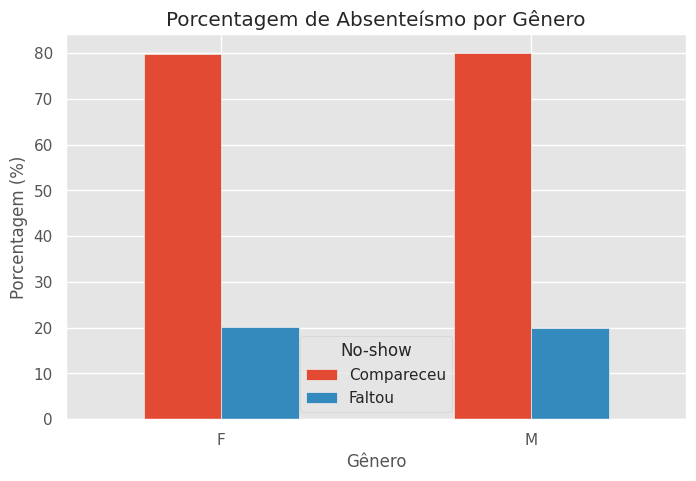

In [ ]:
data = df
# Configuração global para melhorar a aparência dos gráficos
plt.style.use('ggplot')

# Gráfico de Barras - Gênero x Absenteísmo (em porcentagem)
gender_no_show = data.groupby(['Gender', 'No-show']).size().unstack()
gender_no_show_percentage = gender_no_show.div(gender_no_show.sum(axis=1), axis=0) * 100
gender_no_show_percentage.plot(kind='bar', figsize=(8, 5))
plt.title('Porcentagem de Absenteísmo por Gênero')
plt.ylabel('Porcentagem (%)')
plt.xlabel('Gênero')
plt.xticks(rotation=0)
plt.legend(title='No-show')
plt.show()


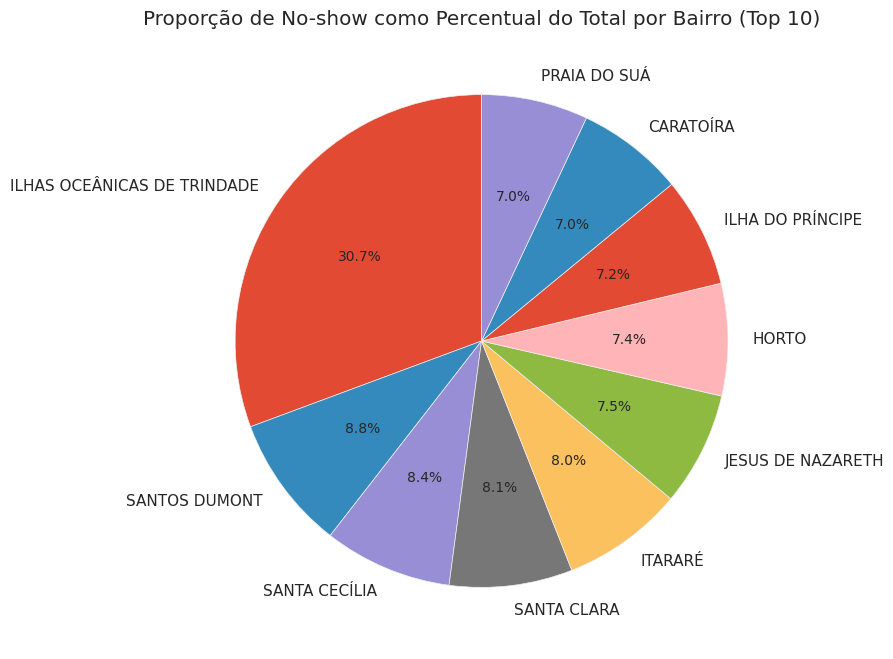

In [ ]:

# Gráfico de Pizza - Proporção de No-show como porcentagem do total de pacientes por bairro
no_show_percentage_by_neighbourhood = (
    data[data['No-show'] == 'Faltou']['Neighbourhood'].value_counts() /
    data['Neighbourhood'].value_counts()
).sort_values(ascending=False).head(10) * 100

no_show_percentage_by_neighbourhood.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90, legend=False)
plt.title('Proporção de No-show como Percentual do Total por Bairro (Top 10)')
plt.ylabel('')  # Remove o rótulo do eixo Y
plt.show()


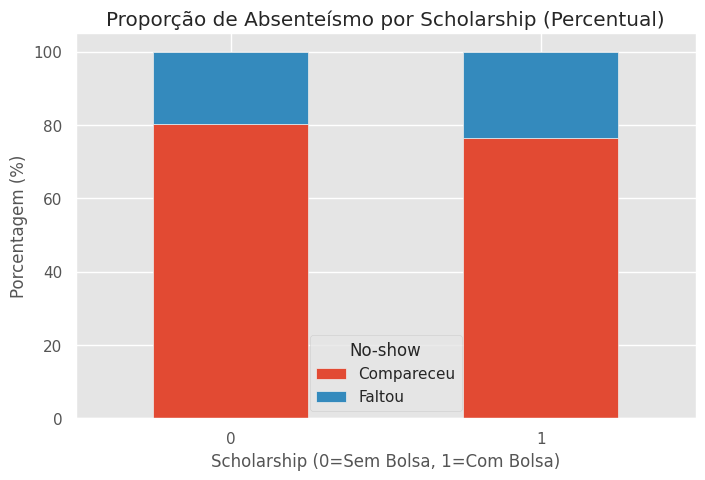

In [ ]:

# Gráfico de Colunas Empilhadas - Scholarship x No-show (em porcentagem)
scholarship_no_show = data.groupby(['Scholarship', 'No-show']).size().unstack()
scholarship_no_show_percentage = scholarship_no_show.div(scholarship_no_show.sum(axis=1), axis=0) * 100

scholarship_no_show_percentage.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Proporção de Absenteísmo por Scholarship (Percentual)')
plt.ylabel('Porcentagem (%)')
plt.xlabel('Scholarship (0=Sem Bolsa, 1=Com Bolsa)')
plt.xticks(rotation=0)
plt.legend(title='No-show')
plt.show()


###5. Gráficos de Variáveis Quantitativas


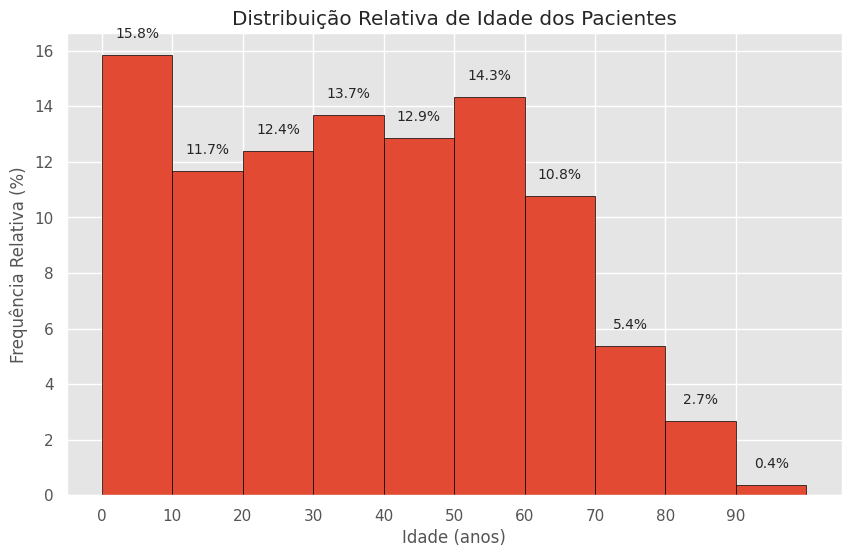

In [ ]:
# Histograma - Distribuição Relativa de Idade dos Pacientes com Valores no Topo
bins = list(range(0, 101, 10))  # Intervalos de idade de 10 em 10 anos
age_bins = pd.cut(data['Age'], bins=bins, right=False)  # Classifica as idades nos intervalos
age_relative_freq = age_bins.value_counts(sort=False, normalize=True) * 100  # Frequência relativa em porcentagem

# Plotar o histograma com bins contíguos
plt.figure(figsize=(10, 6))
bars = plt.bar(
    x=[int(edge) for edge in bins[:-1]],  # Posição central de cada bin
    height=age_relative_freq.values,  # Altura das barras
    width=10,  # Largura das barras igual ao intervalo
    align='edge',  # Alinhar as barras à borda esquerda do intervalo
    edgecolor='black'
)

# Adicionar os valores no topo de cada barra
for bar, value in zip(bars, age_relative_freq.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posição central da barra
        bar.get_height() + 0.5,  # Posição logo acima do topo da barra
        f'{value:.1f}%',  # Valor formatado como percentual
        ha='center', va='bottom', fontsize=10
    )

plt.title('Distribuição Relativa de Idade dos Pacientes')
plt.xlabel('Idade (anos)')
plt.ylabel('Frequência Relativa (%)')
plt.xticks(ticks=[int(edge) for edge in bins[:-1]], labels=[str(int(edge)) for edge in bins[:-1]], rotation=0)
plt.show()


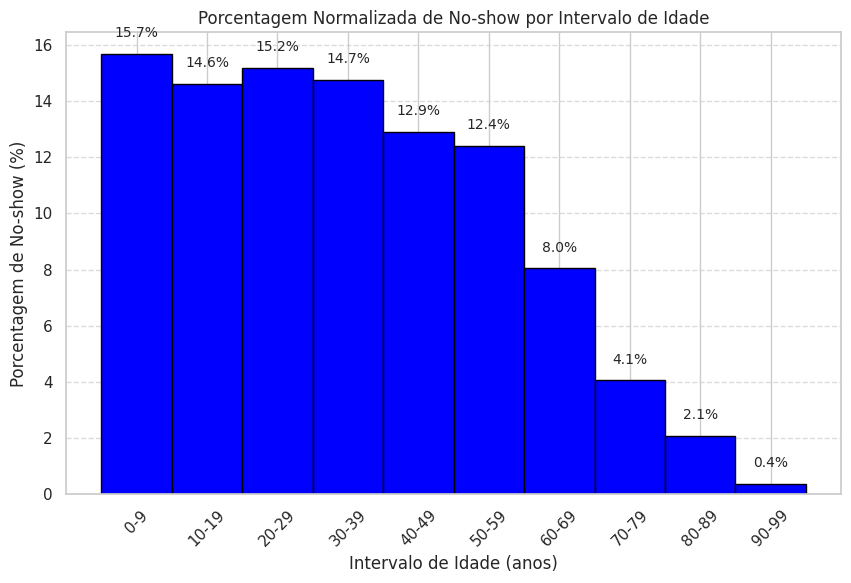

In [20]:
# Histograma - Porcentagem Normalizada de No-show por Intervalo de Idade (Bins Contíguos)
bins = list(range(0, 101, 10))  # Intervalos de idade de 10 em 10 anos
data['AgeBin'] = pd.cut(data['Age'], bins=bins, right=False)  # Classifica as idades nos intervalos

# Calculando a porcentagem de no-show para cada faixa etária em relação ao total de no-shows
total_no_shows = data[data['No-show'] == 'Yes'].shape[0]  # Total de no-shows no dataset
no_show_normalized_percentage_by_age = (
    data[data['No-show'] == 'Yes'].groupby('AgeBin', observed=False).size() / total_no_shows
) * 100

# Remover bins vazios (NaN)
no_show_normalized_percentage_by_age = no_show_normalized_percentage_by_age.dropna()

# Plotando o histograma com bins contíguos
plt.figure(figsize=(10, 6))
bars = plt.bar(
    x=range(len(no_show_normalized_percentage_by_age)),  # Posição dos bins como índices contíguos
    height=no_show_normalized_percentage_by_age.values,  # Porcentagens normalizadas
    width=1.0,  # Largura máxima para contiguidade
    color='blue', edgecolor='black'
)

# Adicionando as porcentagens no topo de cada barra
for bar, value in zip(bars, no_show_normalized_percentage_by_age.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        f'{value:.1f}%',
        ha='center', va='bottom', fontsize=10
    )

plt.title('Porcentagem Normalizada de No-show por Intervalo de Idade')
plt.xlabel('Intervalo de Idade (anos)')
plt.ylabel('Porcentagem de No-show (%)')
plt.xticks(
    ticks=range(len(no_show_normalized_percentage_by_age)),
    labels=[f'{int(bin.left)}-{int(bin.right - 1)}' for bin in no_show_normalized_percentage_by_age.index],
    rotation=45
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-27-f1162fab3147>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[data['No-show'] == 'Yes'].groupby('AgeBin').size() /
<ipython-input-27-f1162fab3147>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[data['No-show'] == 'No'].groupby('AgeBin').size()


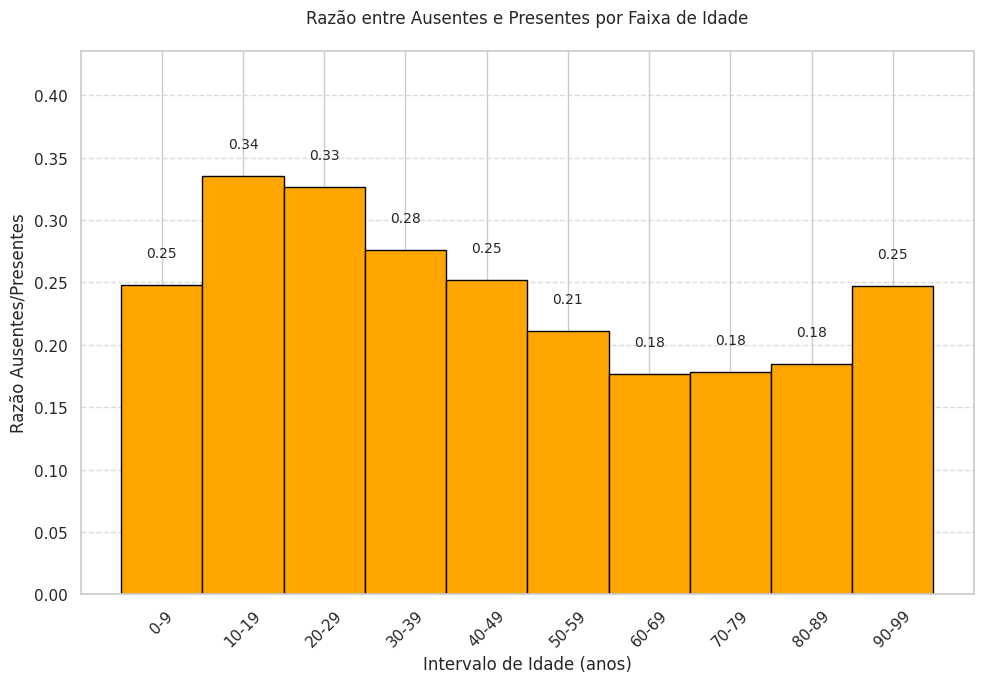

In [27]:
# Histograma - Razão entre Ausentes e Presentes por Faixa de Idade (Ajuste Estético)
bins = list(range(0, 101, 10))  # Intervalos de idade de 10 em 10 anos
data['AgeBin'] = pd.cut(data['Age'], bins=bins, right=False)  # Classifica as idades nos intervalos

# Calculando a razão entre ausentes (Yes) e presentes (No) para cada faixa etária
absent_present_ratio = (
    data[data['No-show'] == 'Yes'].groupby('AgeBin').size() /
    data[data['No-show'] == 'No'].groupby('AgeBin').size()
).fillna(0)  # Preenche valores ausentes com 0 (caso não existam presentes ou ausentes em algum bin)

# Plotando o histograma
plt.figure(figsize=(10, 7))  # Aumentando o espaço vertical do gráfico
bars = plt.bar(
    x=range(len(absent_present_ratio)),  # Posição dos bins como índices contíguos
    height=absent_present_ratio.values,  # Razão entre ausentes e presentes
    width=1.0,  # Largura máxima para contiguidade
    color='orange', edgecolor='black'
)

# Adicionando as razões no topo de cada barra
for bar, value in zip(bars, absent_present_ratio.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.02,  # Adiciona espaço acima da barra
        f'{value:.2f}',  # Formata como razão com duas casas decimais
        ha='center', va='bottom', fontsize=10
    )

# Ajustando o layout do gráfico
plt.title('Razão entre Ausentes e Presentes por Faixa de Idade', pad=20)  # Adiciona espaço entre o título e o gráfico
plt.xlabel('Intervalo de Idade (anos)')
plt.ylabel('Razão Ausentes/Presentes')
plt.xticks(
    ticks=range(len(absent_present_ratio)),
    labels=[f'{int(bin.left)}-{int(bin.right - 1)}' for bin in absent_present_ratio.index],
    rotation=45
)
plt.ylim(top=max(absent_present_ratio.values) + 0.1)  # Ajusta o limite superior do eixo Y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Garante melhor uso do espaço
plt.show()


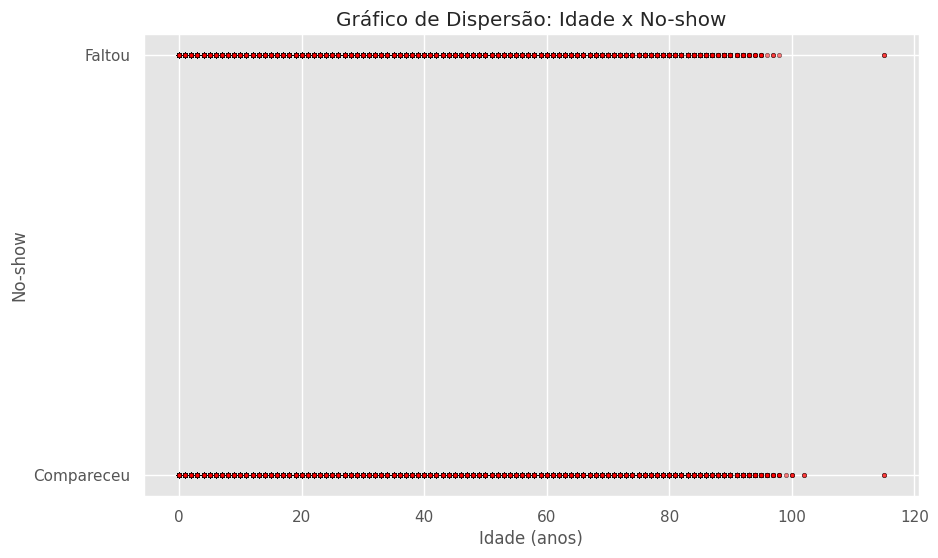

In [ ]:
# [NAO RECOMENDADO]: Gráfico de Dispersão - Idade x No-show
plt.figure(figsize=(10, 6))
plt.scatter(
    x=data['Age'],                       # Idade no eixo X
    y=data['No-show'].map({'Faltou': 1, 'Compareceu': 0}),  # No-show mapeado para 0 e 1
    alpha=0.5,                           # Transparência para melhor visualização
    color='red',                         # Cor dos pontos
    edgecolor='black',                   # Contorno dos pontos
    s=10                                 # Tamanho dos pontos
)
plt.title('Gráfico de Dispersão: Idade x No-show')
plt.xlabel('Idade (anos)')
plt.ylabel('No-show')
plt.yticks([0, 1], labels=['Compareceu', 'Faltou'])  # Rotulando o eixo Y
plt.grid(True)
plt.show()


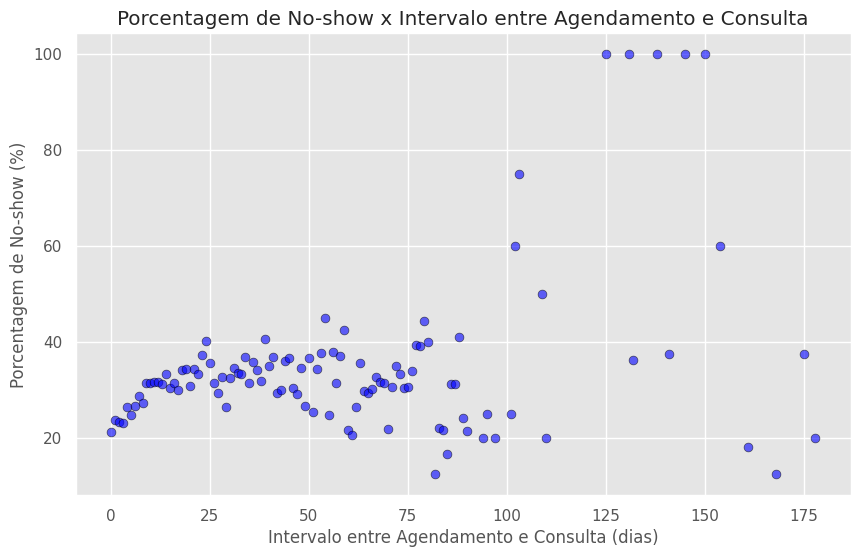

In [ ]:
# Gráfico de Dispersão - Porcentagem de No-show x Intervalo entre Agendamento e Consulta
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])  # Convertendo para datetime
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])  # Convertendo para datetime
data['DaysBetween'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days  # Calculando o intervalo de dias

# Calculando a porcentagem de no-show para cada intervalo de dias
no_show_percentage_by_days = (
    data[data['No-show'] == 'Faltou'].groupby('DaysBetween').size() /
    data.groupby('DaysBetween').size()
) * 100

# Filtrando para intervalos de dias não negativos
no_show_percentage_by_days = no_show_percentage_by_days[no_show_percentage_by_days.index >= 0]

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(
    x=no_show_percentage_by_days.index,  # Intervalo de dias no eixo X
    y=no_show_percentage_by_days.values,  # Porcentagem de no-show no eixo Y
    alpha=0.6,                           # Transparência
    color='blue',                        # Cor dos pontos
    edgecolor='black',                   # Contorno dos pontos
    s=40                                 # Tamanho dos pontos
)
plt.title('Porcentagem de No-show x Intervalo entre Agendamento e Consulta')
plt.xlabel('Intervalo entre Agendamento e Consulta (dias)')
plt.ylabel('Porcentagem de No-show (%)')
plt.grid(True)
plt.show()


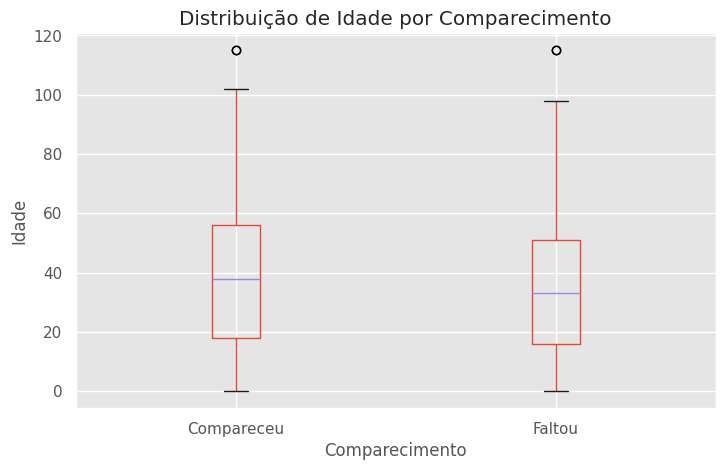

In [ ]:
# Boxplot - Idade por No-show
data.boxplot(column='Age', by='No-show', figsize=(8, 5))
plt.title('Distribuição de Idade por Comparecimento')
plt.suptitle('')  # Remove título automático
plt.xlabel('Comparecimento')
plt.ylabel('Idade')
plt.show()




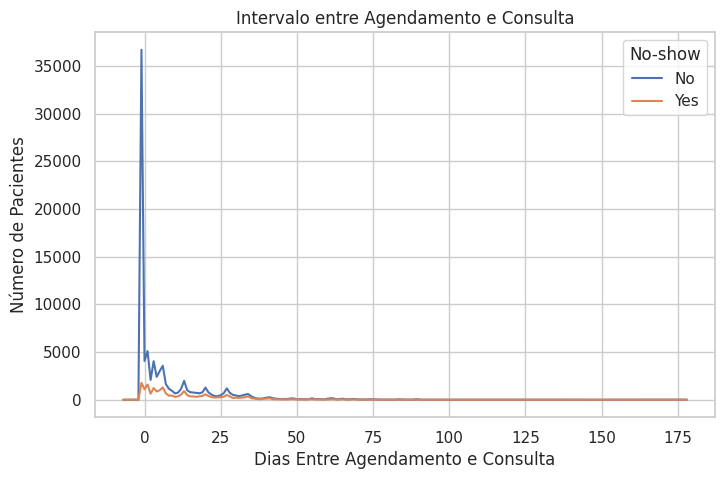

In [ ]:
# Gráfico de Linha - Intervalo entre Agendamento e Consulta
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['DaysBetween'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days
days_between = data.groupby('DaysBetween')['No-show'].value_counts().unstack().fillna(0)
days_between.plot(kind='line', figsize=(8, 5))
plt.title('Intervalo entre Agendamento e Consulta')
plt.xlabel('Dias Entre Agendamento e Consulta')
plt.ylabel('Número de Pacientes')
plt.legend(title='No-show')
plt.show()

<ipython-input-12-b437e1a500be>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('DaysBetweenBin').size() /


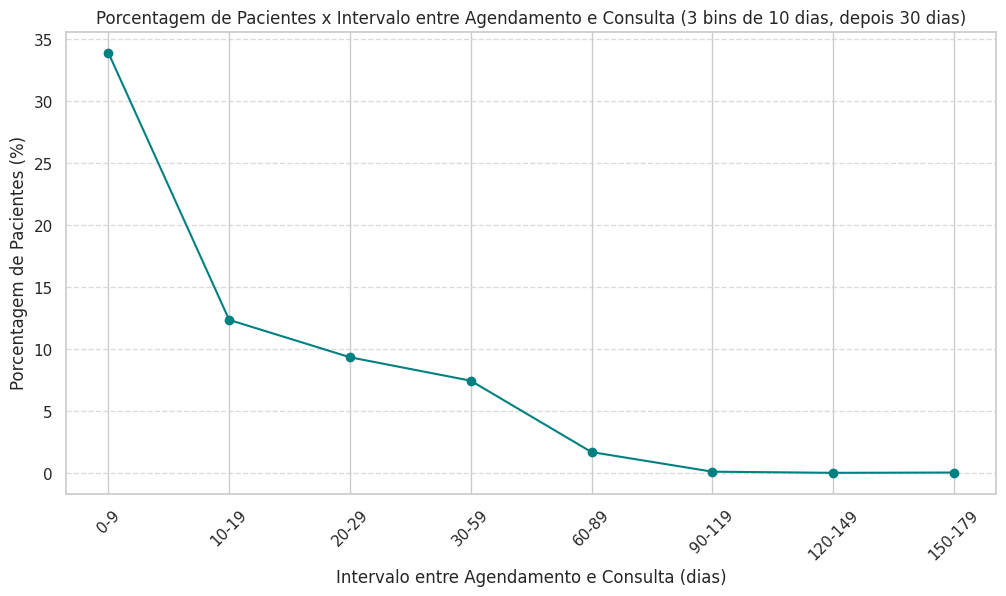

In [ ]:
# Gráfico de Linhas - Porcentagem de Pacientes x Intervalo entre Agendamento e Consulta (3 bins de 10 dias, depois 30 dias)
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])  # Convertendo para datetime
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])  # Convertendo para datetime
data['DaysBetween'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days  # Calculando o intervalo de dias

# Criando bins personalizados (3 primeiros de 10 dias, depois a cada 30 dias, sem duplicar bordas)
bins = [0, 10, 20, 30] + list(range(60, data['DaysBetween'].max() + 30, 30))
data['DaysBetweenBin'] = pd.cut(data['DaysBetween'], bins=bins, right=False)

# Calculando a porcentagem de pacientes para cada intervalo
patients_percentage_by_custom_bins = (
    data.groupby('DaysBetweenBin').size() /
    len(data)
) * 100

# Gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(
    [f'{int(bin.left)}-{int(bin.right - 1)}' for bin in patients_percentage_by_custom_bins.index],  # Rótulos dos bins
    patients_percentage_by_custom_bins.values,
    marker='o', linestyle='-', color='teal'
)
plt.title('Porcentagem de Pacientes x Intervalo entre Agendamento e Consulta (3 bins de 10 dias, depois 30 dias)')
plt.xlabel('Intervalo entre Agendamento e Consulta (dias)')
plt.ylabel('Porcentagem de Pacientes (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()
